In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('cowboys_24-25.csv')

df.head()

,RANK,PLAYER,POS,AGE,CAP HIT,CAP HIT PCT,DEAD CAP,CASH TOTAL,FREE AGENT YEAR
0,1,Dak Prescott,QB,31,43582247,16.99,195270294,81250000,2029
1,2,Zack Martin,G,34,15500000,6.07,41960000,18000000,2025
2,3,Trevon Diggs,CB,27,14117647,5.53,28000000,12000000,2029
3,4,CeeDee Lamb,WR,25,8750000,3.43,67000000,39150000,2030
4,5,Donovan Wilson,S,27,7370575,2.89,10450000,5750000,2026


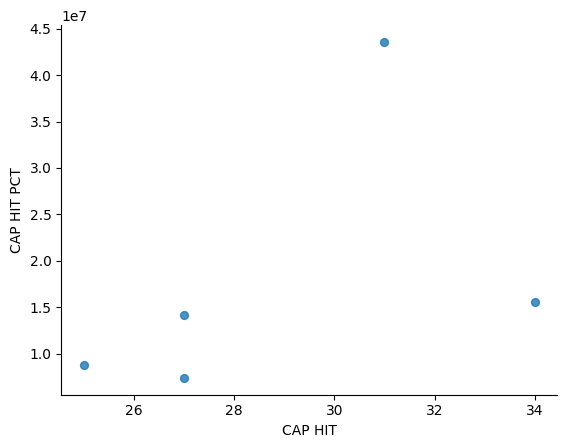

In [49]:
_df_8.plot(kind='scatter', x='CAP HIT', y='CAP HIT PCT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
# Assuming 'POS' is a column in your DataFrame 'df'
for pos in df['POS'].unique():
    # Create a DataFrame with a name based on the position
    globals()[f"df_{pos}"] = df[df['POS'] == pos]
    print(f"DataFrame created: df_{pos}")
  # You can then further process or analyze each df_pos DataFrame
  # based on your requirements.
  # For example, you could save it to a separate file:
  # df_pos.to_csv(f'cowboys_{pos}.csv', index=False)

DataFrame created: df_QB
DataFrame created: df_G
DataFrame created: df_CB
DataFrame created: df_WR
DataFrame created: df_S
DataFrame created: df_RT
DataFrame created: df_DE
DataFrame created: df_FS
DataFrame created: df_P
DataFrame created: df_DT
DataFrame created: df_ILB
DataFrame created: df_LT
DataFrame created: df_RB
DataFrame created: df_TE
DataFrame created: df_OLB
DataFrame created: df_LS
DataFrame created: df_C
DataFrame created: df_FB
DataFrame created: df_K


In [10]:
df_QB.head()

,RANK,PLAYER,POS,AGE,CAP HIT,CAP HIT PCT,DEAD CAP,CASH TOTAL,FREE AGENT YEAR
0,1,Dak Prescott,QB,31,43582247,16.99,195270294,81250000,2029
7,8,Trey Lance,QB,24,5310714,2.08,5310719,5310714,2025
14,15,Cooper Rush,QB,31,2875000,1.13,625000,2250000,2025


In [16]:
df.dtypes

,0
RANK,int64
PLAYER,object
POS,object
AGE,int64
CAP HIT,int64
CAP HIT PCT,float64
DEAD CAP,int64
CASH TOTAL,int64
FREE AGENT YEAR,int64


In [17]:
df['CAP HIT'] = df['CAP HIT'].astype(float)  # Directly convert to float
pos_cap_hit = df.groupby('POS')['CAP HIT'].sum()
print(pos_cap_hit)

POS
C       2064949.0
CB     19655090.0
DE      8648084.0
DT     10167107.0
FB       921666.0
FS      3985296.0
G      21046156.0
ILB     2941165.0
K        915000.0
LS      1152500.0
LT      2391965.0
OLB     4986573.0
P       3800000.0
QB     51767961.0
RB      4203334.0
RT      7495873.0
S       9275575.0
TE      3387134.0
WR     13477124.0
Name: CAP HIT, dtype: float64


<Axes: xlabel='POS'>

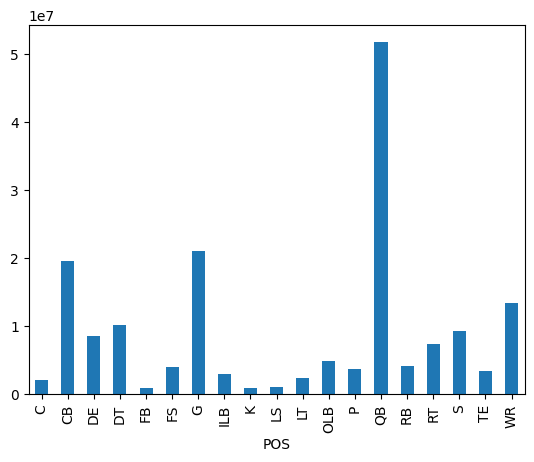

In [19]:
pos_cap_hit.plot.bar()

In [28]:
# seperate based on which side of the ball
offense_cap_hit = pos_cap_hit.loc[['C','G','LT','QB','RB','RT','TE','WR','FB']]
offense_cap_hit['TOTAL'] = offense_cap_hit.sum()
defense_cap_hit = pos_cap_hit.loc[['CB','DE','DT','FS','ILB','S','OLB']]
defense_cap_hit['TOTAL'] = defense_cap_hit.sum()
special_cap_hit = pos_cap_hit.loc[['K','P','LS']]
special_cap_hit['TOTAL'] = special_cap_hit.sum()
offense_cap_hit


,CAP HIT
POS,
C,2064949.0
G,21046156.0
LT,2391965.0
QB,51767961.0
RB,4203334.0
RT,7495873.0
TE,3387134.0
WR,13477124.0
FB,921666.0


In [45]:
team_cap_hit = pd.DataFrame({
    'team': ['offense', 'defense','special','whole team'],
    'total': [offense_cap_hit['TOTAL'], defense_cap_hit['TOTAL'], special_cap_hit['TOTAL'],df['CAP HIT'].sum()]
})
team_cap_hit

,team,total
0,offense,106756162.0
1,defense,59658890.0
2,special,5867500.0
3,whole team,172282552.0


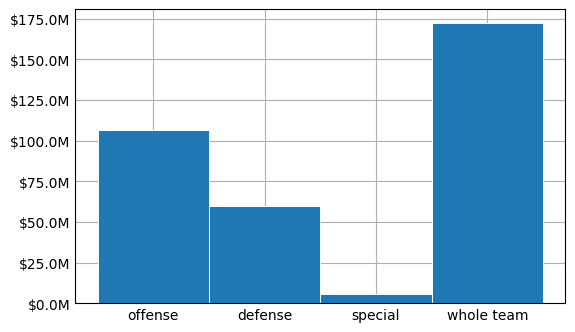

In [79]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use('_mpl-gallery')

# make data:
x = team_cap_hit['team']
y = team_cap_hit['total']

# plot
fig, ax = plt.subplots(figsize=(5, 3))

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

def millions_formatter(x, pos):
    return f'${x/1000000:.1f}M'  # Format as $X.XM

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


plt.show()

In [81]:
# create a scatter plot of contract years/FA years

contract_years = df.groupby('FREE AGENT YEAR')
contract_years

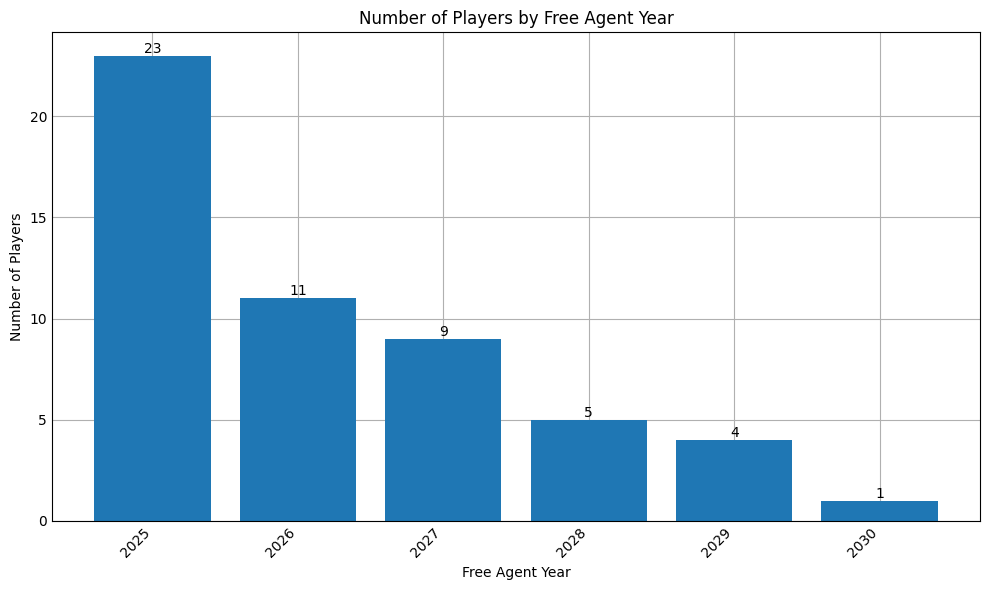

In [84]:
# Group by 'FREE AGENT YEAR' and count the number of players in each year
free_agent_counts = df.groupby('FREE AGENT YEAR')['PLAYER'].count()

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(free_agent_counts.index, free_agent_counts.values)

# Add the exact number on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Free Agent Year')
plt.ylabel('Number of Players')
plt.title('Number of Players by Free Agent Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [95]:
import altair as alt
import pandas as pd

# Assuming 'df' is your DataFrame with 'FREE AGENT YEAR' and 'PLAYER' columns

# Group by 'FREE AGENT YEAR' and count the number of players in each year
free_agent_counts = df.groupby('FREE AGENT YEAR')['PLAYER'].count().reset_index(name='counts')

# Create the Altair chart with animation
alt.Chart(free_agent_counts).mark_bar().encode(
    x=alt.X('FREE AGENT YEAR:O', axis=alt.Axis(title='Free Agent Year')),
    y=alt.Y('counts:Q', axis=alt.Axis(title='Number of Players')),
    # Animation using 'FREE AGENT YEAR'
    color=alt.Color('FREE AGENT YEAR:N', legend=None)  # Animate by color
).properties(
    width=600,
    height=400,
    title='Number of Players by Free Agent Year'
).interactive()  # Enable interactivity for better visualization

alt.Chart(...)

In [87]:
total_cap_hit_2025 = df[df['FREE AGENT YEAR'] == 2025]['CAP HIT'].sum()
cap_space = '$23,038,650'
print(f"The total CAP HIT for players with a FREE AGENT YEAR of 2025 is: ${total_cap_hit_2025:,.2f}")
print(f'With the salary cap available right now being {cap_space}')

The total CAP HIT for players with a FREE AGENT YEAR of 2025 is: $53,456,900.00
With the salary cap available right now being $23,038,650
